# Sales Prediction
## ( Multiple Linear Regression)

### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

### Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Reading and Understanding the Data

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
pwd

'C:\\Users\\hp'

In [4]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [6]:
advertising.shape

(200, 4)

In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [10]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

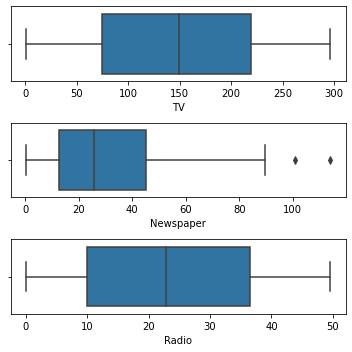

In [13]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

In [12]:
# There are no considerable outliers present in the data.

## Exploratory Data Analysis

#### Sales (Target Variable)

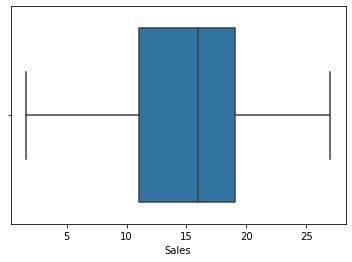

In [14]:
sns.boxplot(advertising['Sales'])
plt.show()

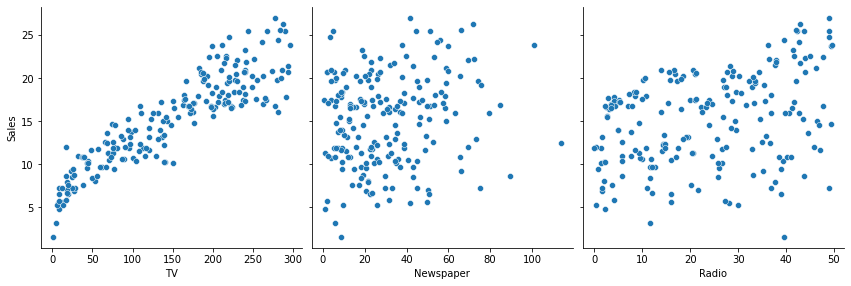

In [15]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

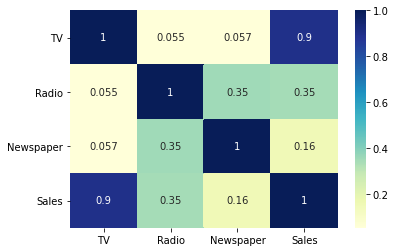

In [16]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

# corr - linear assc between 2 variables
# x variables --> gt0.8 or less than -0.8 (high_pos/high_neg)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = advertising[['Radio', 'TV', 'Newspaper']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0      Radio  3.285462
1         TV  2.486772
2  Newspaper  3.055245


## Model Building

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Performing Simple Linear Regression

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`,'NewsPaper','Radio' in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [21]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    test_size = 0.3,
                                                    random_state = 100)

In [23]:
# Let's now take a look at the train dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [24]:
X_train.shape

(140,)

In [25]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [26]:
X_test.shape

(60,)

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [27]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [28]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [29]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [30]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [31]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.52e-52
Time:                        12:33:13   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [32]:
### Here R Sqr.  -> 0.816 i.e 81%



#### let say we have more x variables

In [35]:
X = advertising[['TV','Newspaper']]
y = advertising['Sales']

### Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    test_size = 0.3,
                                                    random_state = 100)

In [37]:
X_train.head()

,TV,Newspaper
74,213.4,13.1
3,151.5,58.5
185,205.0,19.6
26,142.9,12.6
90,134.3,9.3


In [38]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [39]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [40]:
X_train_sm.head()

,const,TV,Newspaper
74,1.0,213.4,13.1
3,1.0,151.5,58.5
185,1.0,205.0,19.6
26,1.0,142.9,12.6
90,1.0,134.3,9.3


In [41]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [42]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     350.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.38e-54
Time:                        12:43:41   Log-Likelihood:                -312.81
No. Observations:                 140   AIC:                             631.6
Df Residuals:                     137   BIC:                             640.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9619      0.434     13.727      0.0

In [ ]:
# note : R-squared:                       0.836 i.e 83%

### lets make more complicated: by adding one more variable 
    

In [43]:
X = advertising[['TV','Newspaper','Radio']]
y = advertising['Sales']

#### Train-Test Split
You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    test_size = 0.3,
                                                    random_state = 100)

In [45]:
# Let's now take a look at the train dataset
X_train.head()

,TV,Newspaper,Radio
74,213.4,13.1,24.6
3,151.5,58.5,41.3
185,205.0,19.6,45.1
26,142.9,12.6,29.3
90,134.3,9.3,4.9


In [46]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [47]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [48]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [49]:
X_train_sm.head()

,const,TV,Newspaper,Radio
74,1.0,213.4,13.1,24.6
3,1.0,151.5,58.5,41.3
185,1.0,205.0,19.6,45.1
26,1.0,142.9,12.6,29.3
90,1.0,134.3,9.3,4.9


In [50]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [51]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.73e-71
Time:                        12:59:03   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.0

In [53]:
# note : R-squared:                       0.910  i.e 91%

In [54]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const        4.334596
TV           0.053829
Newspaper    0.006290
Radio        0.110012
dtype: float64

In [57]:
# Tell me any one observation you can see in this OLS summary 

# Here we see that p value < 0.05 or p value > 0.05

# pvalue > 0.05 for Newspaper so we will remove this as it is insignificant variable

# if we remove it lets see will R Sqr gets change or not now it is 91%.

In [58]:
# Removing newspaper 

X = advertising[['TV','Radio']]
y = advertising['Sales']

#### Train-Test Split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    test_size = 0.3,
                                                    random_state = 100)

In [60]:
# Let's now take a look at the train dataset
X_train.head()

,TV,Radio
74,213.4,24.6
3,151.5,41.3
185,205.0,45.1
26,142.9,29.3
90,134.3,4.9


In [61]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [63]:
import statsmodels.api as sm

In [64]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [65]:
X_train_sm.head()

,const,TV,Radio
74,1.0,213.4,24.6
3,1.0,151.5,41.3
185,1.0,205.0,45.1
26,1.0,142.9,29.3
90,1.0,134.3,4.9


In [66]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [67]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     692.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           2.38e-72
Time:                        13:21:50   Log-Likelihood:                -271.02
No. Observations:                 140   AIC:                             548.0
Df Residuals:                     137   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4251      0.342     12.923      0.0

In [69]:
# Note : R Sqr -> 91% same and Pvalue of all variables is < 0.05
# we removed because newspaper was insignificant

### Predicting

#### my fit model is stored in lr.

## Model Evaluation

### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [74]:
y_train_pred = lr.predict(X_train_sm)
y_train_pred[:5]

74     18.741673
3      17.300077
185    20.620014
26     15.470964
90     12.231434
dtype: float64

In [75]:
res = (y_train - y_train_pred)

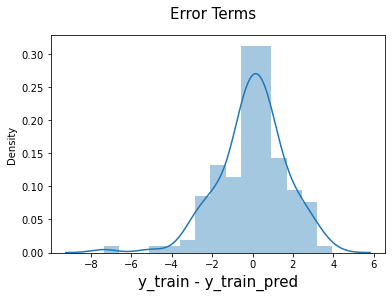

In [76]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [77]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)


In [78]:
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [79]:
y_pred.head()

126     9.270753
104    21.183587
99     16.465767
92     19.986086
111    21.793353
dtype: float64

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the MSE

In [83]:
#Returns the mean squared error; we'll take a square root
(mean_squared_error(y_test, y_pred)).round(2)

2.55

##### Looking at the RMSE

In [86]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test,y_pred)).round(2)

1.6

In [87]:
#Returns the mean absolute_percentage error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.07985160679464588

###### Checking the R-squared on the test set

In [88]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8702269065022534

Mean squared error and Root mean squared error (RMSE), R-Squared and Adjusted R- squared,


LR : finds the best fit line which minimizes the errors (optimal value of m and c)
ypred is close yact error is low)

Assumptions of l.r.
1) linearity
2) Minimizes multi - .corr/VIF
3) Error terms:
a. normally distributed
b. no autocorrelation
c. constant variance

Evaluation metrics :.
1. Rsq: how much variance in y is being explained by x
    disadv. rsq always increases when we add insignificant"x" variances.
2. Adj. rsq. :  penalizes the no of predictirs.
3. Mean abs. Error (m.a.e)
4. mean sqd. Error (m.s.e)
5. root m.S.E